In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, multilabel_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop(['Id'], axis = 1, inplace = True)

<AxesSubplot:>

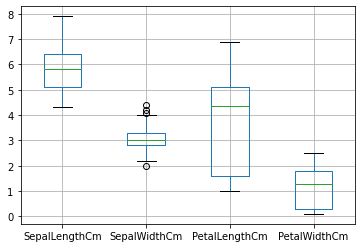

In [5]:
df.boxplot()

In [6]:
# no very distinct outliers 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train test split

In [8]:
x = df.drop('Species', axis = 1)
y = df['Species']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.45, random_state=11, stratify=y)
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
56,6.3,3.3,4.7,1.6
83,6.0,2.7,5.1,1.6
92,5.8,2.6,4.0,1.2
40,5.0,3.5,1.3,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
49,5.0,3.3,1.4,0.2
126,6.2,2.8,4.8,1.8
70,5.9,3.2,4.8,1.8
26,5.0,3.4,1.6,0.4


In [10]:
y_test.value_counts()

Iris-virginica     23
Iris-versicolor    23
Iris-setosa        22
Name: Species, dtype: int64

# Model training

In [11]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

# Evaluation

In [12]:
## Testing daat evaluation
y_pred_test = log_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix : \n', cnf_matrix)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print('Multilabel Confusion matrix : \n', multilabel_cnf_matrix)

acc_score_Logistic_Test = accuracy_score(y_test, y_pred_test)
print('Accuracy score : \n', acc_score_Logistic_Test)

class_report = classification_report(y_test, y_pred_test)
print('Classification report : \n', class_report)


Confusion matrix : 
 [[22  0  0]
 [ 0 23  0]
 [ 0  1 22]]
Multilabel Confusion matrix : 
 [[[46  0]
  [ 0 22]]

 [[44  1]
  [ 0 23]]

 [[45  0]
  [ 1 22]]]
Accuracy score : 
 0.9852941176470589
Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        68
      macro avg       0.99      0.99      0.99        68
   weighted avg       0.99      0.99      0.99        68



In [13]:
# Training Data Evalutaion

y_pred_train = log_reg.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusuion matrix :\n', cnf_matrix)

acc_score__Logistic_Train = accuracy_score(y_train,y_pred_train)
print('Accuracy score :\n', acc_score__Logistic_Train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[28  0  0]
 [ 0 22  5]
 [ 0  1 26]]
Accuracy score :
 0.926829268292683
Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.96      0.81      0.88        27
 Iris-virginica       0.84      0.96      0.90        27

       accuracy                           0.93        82
      macro avg       0.93      0.93      0.93        82
   weighted avg       0.93      0.93      0.93        82



# BY KNN

# Model training

In [14]:
knn_clf = KNeighborsClassifier(n_neighbors=5)  
knn_clf.fit(x_train,y_train)  # model saves training data

KNeighborsClassifier()

In [15]:
# Testing Data Evalutaion

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Test = accuracy_score(y_test,y_pred)
print('Accuracy score :\n', acc_score_KNN_Test)

clf_report = classification_report(y_test,y_pred)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[22  0  0]
 [ 0 23  0]
 [ 0  1 22]]
Accuracy score :
 0.9852941176470589
Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        68
      macro avg       0.99      0.99      0.99        68
   weighted avg       0.99      0.99      0.99        68



In [16]:
# Training Data Evalutaion

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Train = accuracy_score(y_train,y_pred_train)
print('Accuracy score :\n', acc_score_KNN_Train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[28  0  0]
 [ 0 25  2]
 [ 0  2 25]]
Accuracy score :
 0.9512195121951219
Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.93      0.93      0.93        27
 Iris-virginica       0.93      0.93      0.93        27

       accuracy                           0.95        82
      macro avg       0.95      0.95      0.95        82
   weighted avg       0.95      0.95      0.95        82



# standardisation

In [17]:
std_scaler = StandardScaler()
std_scaler.fit(x)  # Saving mean and std

StandardScaler()

In [18]:
standard_array = std_scaler.transform(x)
x_df_std = pd.DataFrame(standard_array, columns = x.columns)
x_df_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_df_std, y, test_size=0.25, random_state=23, stratify =y)
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
109,1.643844,1.263460,1.331416,1.710902
99,-0.173674,-0.587764,0.194102,0.133226
27,-0.779513,1.032057,-1.284407,-1.312977
81,-0.416010,-1.513375,-0.033361,-0.261193
46,-0.900681,1.726266,-1.227541,-1.312977


In [20]:
knn_clf_norm = KNeighborsClassifier(n_neighbors=5)
knn_clf_norm.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
# Testing Data Evalutaion

y_pred = knn_clf_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Test = accuracy_score(y_test,y_pred)
print('Accuracy score :\n', acc_score_KNN_Test)

clf_report = classification_report(y_test,y_pred)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]
Accuracy score :
 0.9736842105263158
Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [22]:
# Training Data Evalutaion

y_pred_train = knn_clf_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Train = accuracy_score(y_train,y_pred_train)
print('Accuracy score :\n', acc_score_KNN_Train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[37  0  0]
 [ 0 35  3]
 [ 0  3 34]]
Accuracy score :
 0.9464285714285714
Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.92      0.92      0.92        38
 Iris-virginica       0.92      0.92      0.92        37

       accuracy                           0.95       112
      macro avg       0.95      0.95      0.95       112
   weighted avg       0.95      0.95      0.95       112



# Decision Tree classification

In [23]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Model Evaluation

In [24]:
# Testing Accuracy

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Test = accuracy_score(y_test, y_pred)
print("Accuracy Score : \n", acc_score_DT_Test)
print("********************************************")

clf_report = classification_report(y_test, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]
********************************************
Accuracy Score : 
 0.9473684210526315
********************************************
Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38

********************************************


In [25]:
# Training Accuracy

y_pred = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Train = accuracy_score(y_train, y_pred)
print("Accuracy Score : \n", acc_score_DT_Train)
print("********************************************")

clf_report = classification_report(y_train, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[37  0  0]
 [ 0 38  0]
 [ 0  0 37]]
********************************************
Accuracy Score : 
 1.0
********************************************
Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        38
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112

********************************************


# Plot DT

In [26]:
plt.figure(figsize = (200,160))
plot_tree(dt_clf, feature_names=x.columns, class_names = ["0", "1","2"], filled = True)
#plt.savefig('DecisionTree.png')

[Text(0.3, 0.9285714285714286, 'PetalLengthCm <= -0.744\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]\nclass = 1'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = 0'),
 Text(0.4, 0.7857142857142857, 'PetalLengthCm <= 0.564\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]\nclass = 1'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = 1'),
 Text(0.5, 0.6428571428571429, 'PetalWidthCm <= 0.659\ngini = 0.176\nsamples = 41\nvalue = [0, 4, 37]\nclass = 2'),
 Text(0.2, 0.5, 'PetalLengthCm <= 0.677\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = 2'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.3, 0.35714285714285715, 'SepalLengthCm <= 0.25\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = 2'),
 Text(0.2, 0.21428571428571427, 'PetalLengthCm <= 0.734\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = 1'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsam

# Hyperparameter Testing

In [27]:
dt_clf = DecisionTreeClassifier()
hyperparameters = {"criterion" : ["gini", "entropy"],
                  "max_depth" : np.arange(3,8),
                  "min_samples_split" : np.arange(2,20),
                  "min_samples_leaf" : np.arange(2,10)}

In [28]:
gscv_dt_model = GridSearchCV(dt_clf, hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [29]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)

In [30]:
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=12)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=12)

In [31]:
# Testing Accuracy

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Test = accuracy_score(y_test, y_pred)
print("Accuracy Score : \n", acc_score_DT_Test)
print("********************************************")

clf_report = classification_report(y_test, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[13  0  0]
 [ 0 10  2]
 [ 0  1 12]]
********************************************
Accuracy Score : 
 0.9210526315789473
********************************************
Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

********************************************


In [32]:
# Training Accuracy

y_pred = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Train = accuracy_score(y_train, y_pred)
print("Accuracy Score : \n", acc_score_DT_Train)
print("********************************************")

clf_report = classification_report(y_train, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[37  0  0]
 [ 0 34  4]
 [ 0  0 37]]
********************************************
Accuracy Score : 
 0.9642857142857143
********************************************
Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      0.89      0.94        38
 Iris-virginica       0.90      1.00      0.95        37

       accuracy                           0.96       112
      macro avg       0.97      0.96      0.96       112
   weighted avg       0.97      0.96      0.96       112

********************************************


# Random Forest

In [33]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [34]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n", cnf_matrix)

acc_score_RF_Test = accuracy_score(y_test,y_pred)
print("Accuracy score \n", acc_score_RF_Test)

clf_report = classification_report(y_test,y_pred)
print("Classification report \n", clf_report)

Confusion Matrix 
 [[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]
Accuracy score 
 0.9473684210526315
Classification report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [35]:
# Training Data Evaluation
y_pred = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix \n", cnf_matrix)

acc_score_RF_Train = accuracy_score(y_train,y_pred)
print("Accuracy score \n", acc_score_RF_Train)

clf_report = classification_report(y_train,y_pred)
print("Classification report \n", clf_report)

Confusion Matrix 
 [[37  0  0]
 [ 0 38  0]
 [ 0  0 37]]
Accuracy score 
 1.0
Classification report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        38
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



# Hyperparameter Tuning

In [36]:
rf_model = RandomForestClassifier(random_state=10)

hyp = {"n_estimators" : np.arange(10,200),
    "criterion":['gini','entropy'],
    "max_depth":np.arange(5,15),
    "min_samples_split":np.arange(5,20),
    "min_samples_leaf":np.arange(5,15),
    "max_features":['auto']}

In [37]:
rscv_rf_clf =RandomizedSearchCV(rf_model, hyp, cv = 5)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=13, min_samples_split=16,
                       n_estimators=193, random_state=10)

In [38]:
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=10,
                       min_samples_split=6, n_estimators=28, random_state=10, oob_score=True)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=10,
                       min_samples_split=6, n_estimators=28, oob_score=True,
                       random_state=10)

In [39]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix", cnf_matrix)

acc_score_RF_Test = accuracy_score(y_test,y_pred)
print("Accuracy score", acc_score_RF_Test)

clf_report = classification_report(y_test,y_pred)
print("Classification report", clf_report)

Confusion Matrix [[13  0  0]
 [ 0 10  2]
 [ 0  1 12]]
Accuracy score 0.9210526315789473
Classification report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [40]:
# Training Data Evaluation
y_pred = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix", cnf_matrix)

acc_score_RF_Train = accuracy_score(y_train,y_pred)
print("Accuracy score", acc_score_RF_Train)

clf_report = classification_report(y_train,y_pred)
print("Classification report", clf_report)

Confusion Matrix [[37  0  0]
 [ 0 36  2]
 [ 0  0 37]]
Accuracy score 0.9821428571428571
Classification report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      0.95      0.97        38
 Iris-virginica       0.95      1.00      0.97        37

       accuracy                           0.98       112
      macro avg       0.98      0.98      0.98       112
   weighted avg       0.98      0.98      0.98       112



In [41]:
df = pd.DataFrame(columns=['train_acc','Test_acc'],index=['Logistic_IRIS','KNN_IRIS','DT_IRIS','RF_IRIS'])
df

,train_acc,Test_acc
Logistic_IRIS,NaN,NaN
KNN_IRIS,NaN,NaN
DT_IRIS,NaN,NaN
RF_IRIS,NaN,NaN


In [42]:
df['train_acc'] = [acc_score__Logistic_Train,acc_score_KNN_Train,acc_score_DT_Train,acc_score_RF_Train]
df['Test_acc'] = [acc_score_Logistic_Test,acc_score_KNN_Test,acc_score_DT_Test,acc_score_RF_Test]

In [43]:
df.to_csv('IRIS_ACC.csv')
df

,train_acc,Test_acc
Logistic_IRIS,0.926829,0.985294
KNN_IRIS,0.946429,0.973684
DT_IRIS,0.964286,0.921053
RF_IRIS,0.982143,0.921053
